In [1]:
import numpy as np
from scipy import linalg
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib inline

Create a random number generator.

In [2]:
rng = np.random.default_rng()

Helper function to solve LQR problems

In [3]:
def lqr(A, B, Q, R):
    P = linalg.solve_continuous_are(A, B, Q, R)
    K = linalg.inv(R) @  B.T @ P
    return K

Model

In [4]:
A = np.array([[0.]])
B = np.array([[1.]])
C = np.array([[1.]])
D = np.array([[0.]])

Observer

In [5]:
Qo = np.array([[1.]])
Ro = np.array([[1.]])
L = lqr(A.T, C.T, linalg.inv(Ro), linalg.inv(Qo)).T

Simulation:

* Create array of times (and find time step)
* Sample input, disturbance, and noise at each time

If you want to compare results for different choices of observer, do *not* reevaluate this cell.

In [6]:
# Array of times
t = np.linspace(0., 25., 100)
dt = t[1] - t[0]

# Input, disturbance, noise
u = 0. * np.ones(len(t))
d = np.sqrt(0.005) * rng.standard_normal(len(t))
n = np.sqrt(0.05) * rng.standard_normal(len(t))

# Initial conditions
x0 = np.array([[1.25]])

Simulation:

* Compute state and output as functions of time
* Compute state estimate
* Plot results

Note that we are computing an "exact" state estimate instead of using Euler integration as we might do when implementing continuous-time observers in practice. Also note that we are shifting the state estimate forward by one time step when plotting, to emphasize its association with the output (i.e., with the sensor measurement).

(0.0, 2.0)

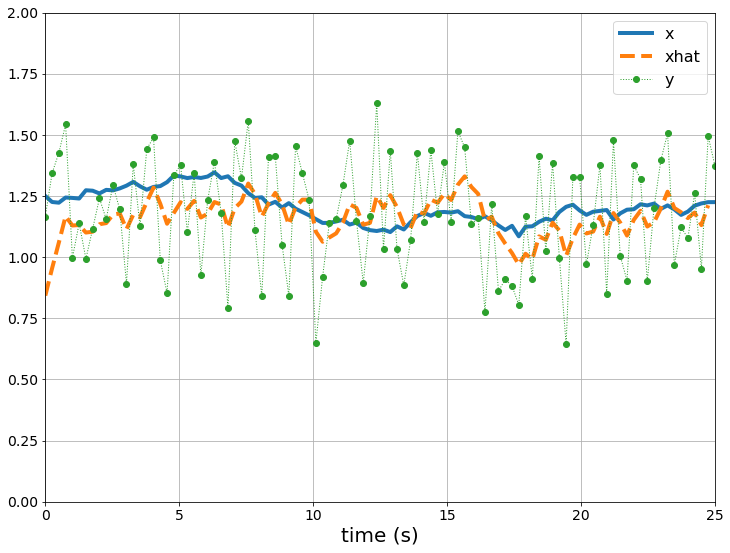

In [7]:
# State and output
t, y, x = signal.lsim((A, B, C, D), u + d, t, X0=x0, interp=False)
y += n

# State estimate
xhat0 = np.array([[0.75]])
t, _, xhat = signal.lsim((A - L @ C, np.hstack([B, L]), C, np.zeros((1, 2))),
                         np.vstack([u, y]).T, t, X0=xhat0, interp=False)
    
# Plot results
plt.figure(figsize=(12, 9))
plt.plot(t, x, '-', linewidth=4, label='x')
plt.plot(t[0:-1], xhat.flatten()[1:], '--', linewidth=4, label='xhat')
plt.plot(t, y, '.:', markersize=12, label='y', linewidth=1)
plt.legend(fontsize=16)
plt.xlabel('time (s)', fontsize=20)
plt.tick_params(labelsize=14)
plt.grid()
plt.xlim([t[0], t[-1]])
plt.ylim([0, 2])